# Исследование объявлений о продаже квартир

**Цели исследования:**

* Научиться определять рыночную стоимость недвижимости, установить параметры;
* Разработать автоматизированную систему, позволяющую отследить аномалии и мошенническую деятельность.

**Исходные данные:**

Данные сервиса Яндекс.Недвижимость - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/Users/khart/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


В таблице 23699 строк, 22 столбца.

После отображения первых 5 строк видно, что в нескольких колонках есть пропущенные значения - NaN, необходимо будет часть пропусков заменить.
После отображения информации о таблице также видно, что в столбцах "ponds_nearest" (9110), "parks_nearest" (8079), "is_apartment" (2775) мало заполненных строк, необходимо обратить внимание.

3.	Построим общую гистограмму для всех числовых столбцов таблицы.

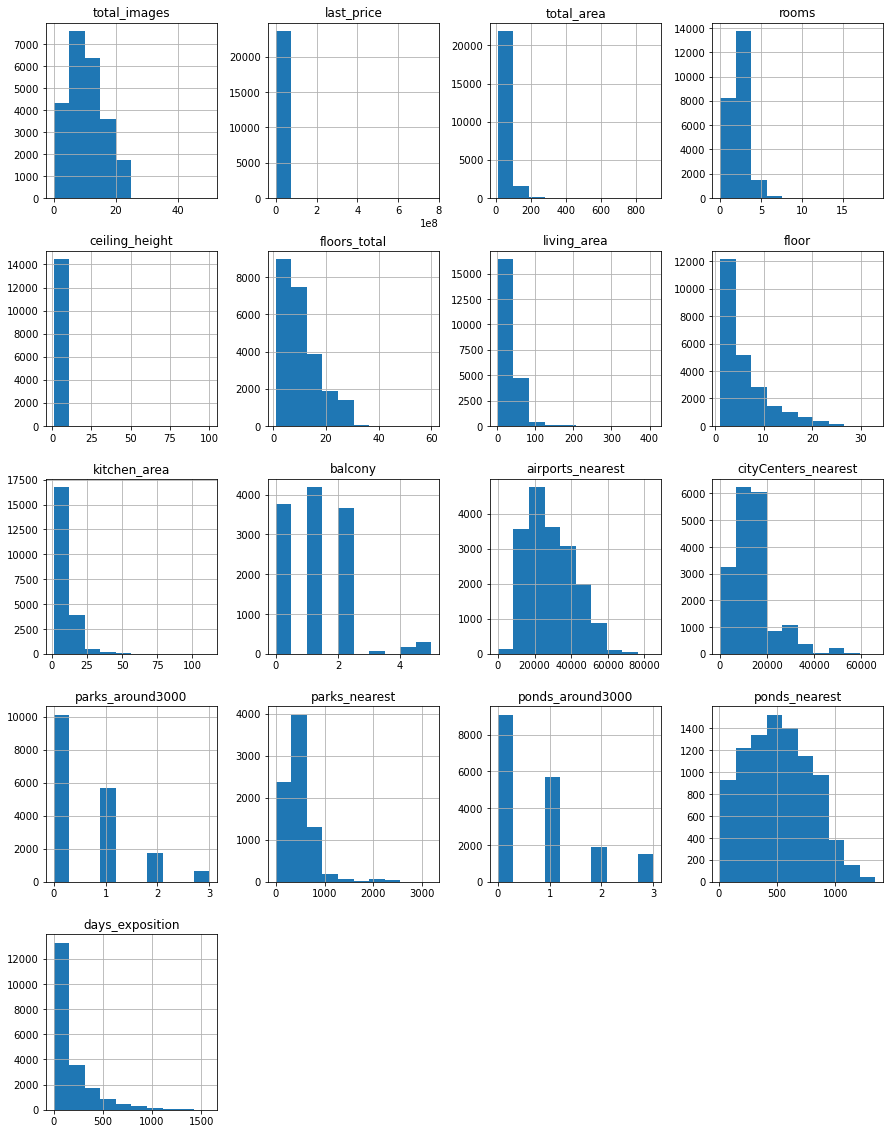

In [5]:
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

Для начала проверим пропуски значений во всех столбцах таблицы:

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Итого, необходимо будет проанализировать пропуски в следуюших столбцах:

ceiling_height(9195), floors_total(86), living_area(1903), is_apartment(20924), kitchen_area(2278),  balcony(11519), locality_name(49), airports_nearest(5542), cityCenters_nearest(5519), parks_around3000(5518), parks_nearest(15620), ponds_around3000(5518), ponds_nearest(14589), days_exposition(3181).

Изучим пропуски в столбце `ceiling_height`, просмотрим уникальные значения.

In [7]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Удалим значение `ceiling_height` равное 100 м на значение 0, так как по 100 м потолков в квартире не бывает, ошибка ввода данных.

In [8]:
data.loc[data['ceiling_height'] == 100, 'ceiling_height'] = 0

In [9]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76, 25.  ,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,
        2.66,  2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,
        3.15,  3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,
        5.3 ,  5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,
        2.83,  4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,
        3.35,  2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,
        3.52,  3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,
        4.19,  3.24,  4.8 ,  4.5 ,  4.2 ,  3.36, 32.  ,  3.08,  3.68,
        3.07,  3.37,  3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,
        3.14,  4.37,  2.68,  3.22,  3.27, 27.  ,  4.1 ,  2.93,  3.46,
       24.  ,  3.47,

Всё еще остались подозрительные значения, такие как 24, 10.3, 22.6, 27, 26, 14. Можно предположить, что значения, начинающиеся на 2 и 3 - ошибки ввода и мелось ввиду не *24, 22.6, 26, 27,* а *2.4, 2.26, 2.6, 2.7*. Остальные значения (*10.3, 14*) примем за вылет и удалим. 

In [10]:
data['ceiling_height'] = data['ceiling_height'].replace(24, 2.4)
data['ceiling_height'] = data['ceiling_height'].replace(22.6, 2.26)
data['ceiling_height'] = data['ceiling_height'].replace(26, 2.6)
data['ceiling_height'] = data['ceiling_height'].replace(27, 2.7)
data['ceiling_height'] = data['ceiling_height'].replace(20, 2)
data['ceiling_height'] = data['ceiling_height'].replace(27.5, 2.75)
data['ceiling_height'] = data['ceiling_height'].replace(25, 2.5)
data['ceiling_height'] = data['ceiling_height'].replace(32, 3.2)
data.loc[data['ceiling_height'] == 10.3, 'ceiling_height'] = 0
data.loc[data['ceiling_height'] == 14, 'ceiling_height'] = 0


In [11]:
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87,
       2.66, 2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55,
       3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95,
       4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 ,
       3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63,
       3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19,
       3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 8.  ,
       3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 ,
       2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 1.2 , 8.3 , 2.98, 2.86, 3.17,
       4.4 , 3.28, 3.04, 4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78,
       4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.

Значения столбца приведены к нормальным.

In [12]:
data['ceiling_height'].median()

2.65

Медианное значение получилось адекватное действительности, можем заменить пропуски в столбце `ceiling_height`. Убедимся, что пропусков в столбце больше нет.

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isnull().sum()

0

In [14]:
data['ceiling_height'] = data['ceiling_height'].replace(0, 2.65)

Рассмотрим пропуски в столбце `floors_total`, как известно, их 89.

In [15]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [16]:
data['floors_total'].median()

9.0

В столбце `floors_total` достаточно сильный разброс значений. Медиана, равная **9** не является репрезентабельной в данном случае. Ввиду того, что значение не зависит от других параметров и является полностью случайным, а также пропущенных значений не много и не вляет на иследование, пропуски в данном столбце можно оставить.

Переходим к пропускам в столбце `living_area`, их 1903.

Найдем среднюю разницу между общей площадью и жилой площадью. Данный коэффициент пригодится, чтобы заполнить пропуски.

In [17]:
differense = data['total_area'].mean()/data['living_area'].mean()
differense

1.75137586199633

Заполним пропуски - для каждого пропущенного `living_area` разделим общую площадь на получившийся коэффициент. Проверим наличие пропусков.

In [18]:
for living_area in data['living_area']:
    data.loc[data['living_area'].isna(), 'living_area'] = data.loc[:, 'total_area'] / differense

In [19]:
data['living_area'].isna().sum()

0

Переходим к столбцу `is_apartment`.
Так как владельцы апартаментов указывают тип, если это апартаменты и является важным моментом при  принятии решения покупателем, то будем считать, что у всех, кто не указал значение в столбце `is_apartment` квартиры, а значит "не апартаменты". Так как предполагается будев тип, пропуски заполняем "False":

In [20]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [21]:
data['is_apartment'].isna().sum()

0

Пропуски в столбце `kitchen_area` оставим, так как кухни могут быть разными по площади, возможно некоторые кухни больше, чем площади квартир. В таком случае, не корректно использовать среднее значение и медиану.

Аналогично поступим и с пропусками в стоблце `balcony`. Скорее всего, приналичии балкона продавцы указывают это, так как это очень важное преимущество. А те, кто не указал, скорее всего, не имеет балконов.
Таким образом, заполним пропуск значением "0".

In [22]:
data['balcony'] = data['balcony'].fillna('0')

In [23]:
data['balcony'].isna().sum()

0

Заполним пропуски в столбце `locality_name` пустой строкой, потому что нет информации, к какому населенному пункту относятся пропущенные квартиры. Убедимся, что пропусков в столбце больше нет.

In [24]:
data['locality_name'] = data['locality_name'].fillna(' ')
data['locality_name'].isna().sum()

0

Рассмотрим столбец `last_price`:

In [25]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Заменим слишком большие значения столбца `last_price` (более 100 000 000) на медианное значение:

In [26]:
for last_price in data['last_price'].unique():
    data.loc[data['last_price'] > 1.000000e+08, 'last_price'] = 4.650000e+06

Заменим слишком маленькое значение столбца last_price (121 9000) на медианное значение:

In [27]:
data['last_price'] = data['last_price'].replace( 1.219000e+04, 4.650000e+06)

In [28]:
data['last_price'].describe()

count    2.369900e+04
mean     6.249203e+06
std      6.419564e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64

Рассмотрим столбец `rooms`:

In [29]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Заменим квартиры с комнатами больше чем 10 на медианное значение - 2:

In [30]:
for rooms in data['rooms'].unique():
    data.loc[data['rooms'] > 7, 'rooms'] = 2

Заменим квартиры с 0 комнатами на медианное значение - 2:

In [31]:
for rooms in data['rooms'].unique():
    data.loc[data['rooms'] == 0, 'rooms'] = 2

In [32]:
data['rooms'].describe()

count    23699.000000
mean         2.076796
std          1.017408
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Изучим уникальные названия населенных пунктов.

In [33]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Заменим "поселок" на "посёлок":

In [34]:
data['locality_name'] = data['locality_name'].replace('поселок', 'посёлок', regex=True)

In [35]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет

Рассмотрим типы данных столбцов:

In [36]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                  object
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Изменим тип столбца `first_day_exposition` на дату:

In [37]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

**Итого:**
В данном разделе мы провели предобработку данных.
Обнаружены пропуски в следующих столбцах: ceiling_height(9195), floors_total(86), living_area(1903), is_apartment(20924), kitchen_area(2278), balcony(11519), locality_name(49), airports_nearest(5542), cityCenters_nearest(5519), parks_around3000(5518), parks_nearest(15620), ponds_around3000(5518), ponds_nearest(14589), days_exposition(3181).

Мы заполнили пропуски в столбцах - ceiling_height, floors_total, living_area, is_apartment, balcony, kitchen_area, locality_name.
Отдльно отметим столбец `airports_nearest`. Была попытка заменить пропуски в данном столбце медианой по группам, сформированной по населенным пунктам, но замена не удалась, так как пропусков слишком много, столбец в группах также был иногда нулевым.

Заменили слишком большие значения столбца last_price (более 100 000 000) и слишком маленькое значение (121 9000) на медианное значение.

Пропуски в "картографических" столбцах было решено оставить, так как пропусков очень много и применение группировки по населенному пункту также не решило этот вопрос. Замена данных типов пропусков на медианное значение по столбцу будет очень грубым и не показательным.

Провели предобработку столбца `ceiling_height` - удалили вылеты, заменили аномальные значения.

Заменили в названиях населенных пунктов "поселок" на "посёлок".

Проверили типы данных столбцов - столбцы с датами перевели в формат даты.

Таким образом, предобработка проведена.

### Исследовательский анализ данных

Создадим столбец `price_meter` и  посчитаем в нем цену квадратного метра, поделив цену на общую площадь.

In [38]:
data['price_meter'] = data['last_price'] / data['total_area']
data['price_meter'].head()

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: price_meter, dtype: float64

Видим, что много цифр после запятой, округляем до 2 знаков:

In [39]:
data['price_meter'] = data['price_meter'].round(2)
data['price_meter'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_meter, dtype: float64

Создадим столбец `weekday` - день недели публикации объявления с помощью *dt.weekday* и столбца `first_day_exposition`, где "0" - понедельник, "1" - вторник и т.д.:

In [40]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

Создадим столбец `month` - месяц публикации объявления с помощью *dt.month* и столбца `first_day_exposition` в числовом формате:

In [41]:
data['month'] = data['first_day_exposition'].dt.month
data['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

Создадим столбец `year` - год публикации объявления с помощью *dt.year* и столбца `first_day_exposition`:

In [42]:
data['year'] = data['first_day_exposition'].dt.year
data['year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

Создадим столбец `floor_category`  и присвоим тип этажам квартиры - *«первый», «последний», «другой»*:

In [43]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
        
data['floor_category'] = data.apply(floor_category, axis = 1)
data['floor_category'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_category, dtype: object

Создадим столбец `distance_to_center_km` - расстояние до центра города в километрах.

In [44]:
data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695    13098.5
23696    13098.5
23697    10364.0
23698    13098.5
Name: cityCenters_nearest, Length: 23699, dtype: float64

In [45]:
data['distance_to_center_km'] = data['cityCenters_nearest']/1000

In [46]:
data['distance_to_center_km'] = data['distance_to_center_km'].fillna(data['distance_to_center_km'].median())

In [47]:
data['distance_to_center_km'] = data['distance_to_center_km'].astype('int')
data['distance_to_center_km'].head()

0    16
1    18
2    13
3     6
4     8
Name: distance_to_center_km, dtype: int32

### Проведите исследовательский анализ данных

Для начала, построим гистограммы для следующих столбцов: `total_area, living_area, kitchen_area, rooms, ceiling_height, parks_nearest, cityCenters_nearest, airports_nearest`.


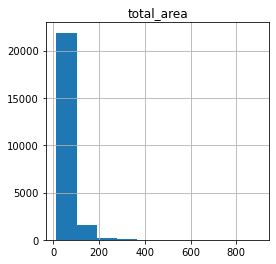

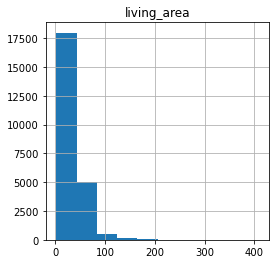

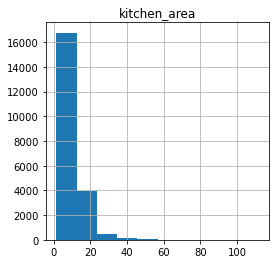

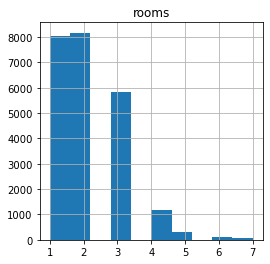

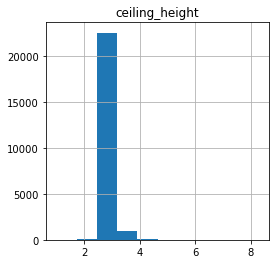

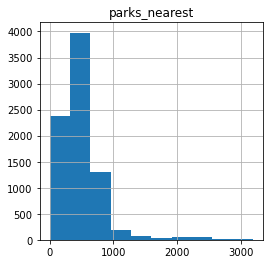

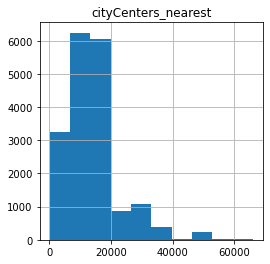

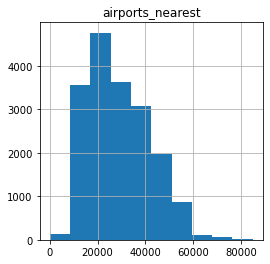

In [48]:
columns_hist=['total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', 'parks_nearest', 'cityCenters_nearest', 'airports_nearest']

for column in columns_hist:
    data.hist(column, figsize=(4,4))
plt.show()

* Рассмотрим подробнее `total_area`:

In [49]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Распределение в столбце `total_area` нормальное, значения смещены влево, что говорит о том, что больше всего квартир имеют площадь до 100 кв. м.
Небольшой и узкий "хвост" диаграммы показывает, что также есть небольшое количество квартир площадью до 400 кв.м. Вылетов нет, данные адекватны. Минимальная площадь - 12 кв.м., средняя - 60 кв.м., максимальная- 900 кв.м.

* Рассмотрим подробнее `living_area`:

In [50]:
data['living_area'].describe()

count    23699.000000
mean        34.594076
std         22.354668
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Распределение в столбце `living_area ` нормальное, схожее с `total_area`, что логично, так как данные столбцы имеют высокую корреляцию. Жилая площадь квартир чаще всего до 90 кв.м., небольшой "хвост" тянется до значения 200 кв.м. Вылетов нет, данные адекватны.
Минимальная жилая площадь - 2 кв.м., средняя - 34 кв.м., максимальная - 410 кв.м.

 * Рассмотрим подробнее `kitchen_area`:

In [51]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Распределение в столбце `kitchen_area` нормальное, схожее с предыдущими столбцами, так как данные столбцы также взаимозависимы. Площадь квартир чаще всего до 10 кв.м., есть "ступенька", которая показывает что значительное количество квартир имеют кухню до 21 кв.м., небольшой "хвост" тянется до значения 55 кв.м. Вылетов нет, данные адекватны. Минимальная жилая площадь - 1 кв.м., средняя - 10 кв.м., максимальная - 112 кв.м.

* Рассмотрим подробнее `rooms`:

In [52]:
data['rooms'].describe()

count    23699.000000
mean         2.076796
std          1.017408
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Распределение в столбце `rooms` нормальное, без вылетов. Двух-трёхкомнатных квартир больше, далее идут однокомнатные, небольшая "ступенька" четырех-пяти-шестикомнатных, небольшой "хвостик" вправо.

* Рассмотрим подробнее `ceiling_height`:

In [53]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.697609
std          0.232457
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

Столбец `ceiling_height` имеет нормальное распределение. С данными все в порядке - в основном квартиры имеют высоту потолка около 3 м, небольшой "хвост" справа говорит о наличии квартир с потолками до 4 м. Что же касается узкой полосы слева, указывающей на квартиры с высотой потолка от 1 м - возможно, речь идет о не жилых помещениях - бытовках, камерах хранения и т.п.

* Рассмотрим подробнее `parks_nearest`:

In [54]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Столбец `parks_nearest` имеет нормальное распределение. Пик приходится на значение 500 м, значения уменьшаются в основном до 1000 м, узкий "хвост" тянется до 3000 м.

* Рассмотрим подробнее `cityCenters_nearest`:

In [55]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Распределение в `cityCenters_nearest` нормальное, есть небольшой вылет в значении 50 км. В основном, аэропорты расположены до 20 км.

* Рассмотрим подробнее `airports_nearest`:

In [56]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Распределение в `airports_nearest` нормальное. Пик значений на удаленность от аэропорта около 20 км. Далее большой массив данных  до 60 км.

In [57]:
data['last_price'] = data['last_price']/1000000

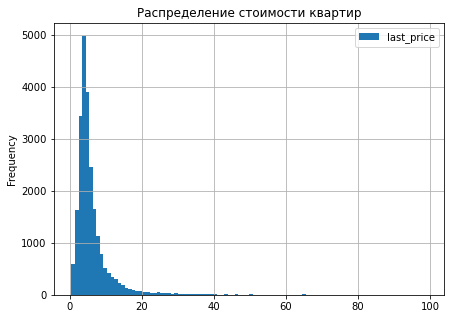

In [58]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (7,5))
plt.title('Распределение стоимости квартир')
plt.show()

In [59]:
data['last_price'].describe()

count    23699.000000
mean         6.249203
std          6.419564
min          0.430000
25%          3.400000
50%          4.650000
75%          6.750000
max         99.000000
Name: last_price, dtype: float64

Распределение в `last_price` нормальное. Средняя - 4 650 000, минимальная -  430 0000.

* Построим графики распределения для столбцов, связанных с этажами - `floor`, `floors_total`, `floor_category`:

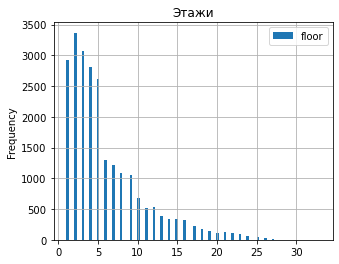

In [60]:
data.plot(y = 'floor', kind = 'hist', bins = 100, grid=True, figsize = (5,4))
plt.title('Этажи')
plt.show()

In [61]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

С данными в столбце `floor` все в порядке - в основном квартиры расположены с 1 по 5 этажи. Далее с понижением хвост тянется до 33го этажа.

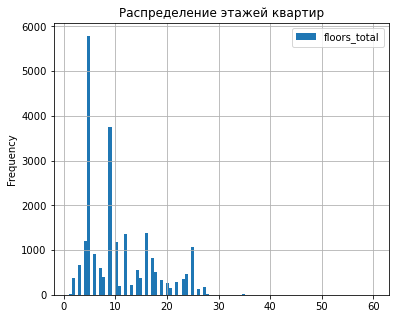

In [62]:
data.plot(y = 'floors_total', kind = 'hist', bins = 100, grid=True, figsize = (6,5))
plt.title('Распределение этажей квартир')
plt.show()

In [63]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Распределние соответствует основной этажности домов в  России - пик приходится на 5ти-этажные дома, далее идут 9ти-этажные, также есть скачки на значениях 12, 16 и 25.
График показывает, что данные соответствуют действительности.

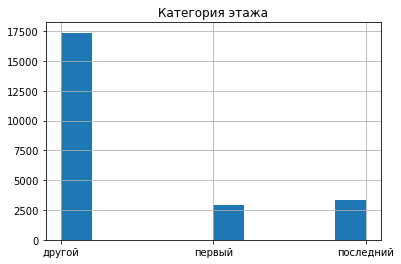

In [64]:
data['floor_category'].hist()
plt.title('Категория этажа')
plt.show()

In [65]:
data['floor_category'].describe()

count      23616
unique         3
top       другой
freq       17363
Name: floor_category, dtype: object

Распределение значений столбца `floor_category` также соответствует действительности. Значений "другой" больше, чем остальных.

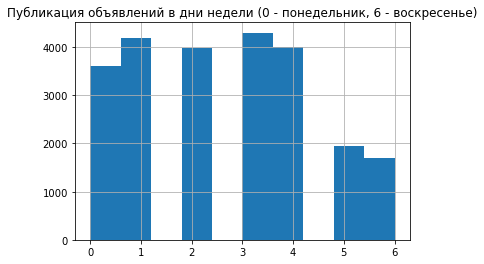

In [66]:
data['weekday'].hist()
plt.title('Публикация объявлений в дни недели (0 - понедельник, 6 - воскресенье)')
plt.show()

Распределение значений столбца `'weekday` показывает, что в выходные люди в 2 раза реже публикуют объявления.

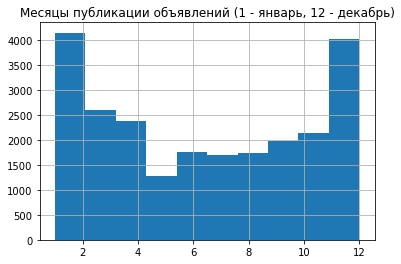

In [67]:
data['month'].hist()
plt.title('Месяцы публикации объявлений (1 - январь, 12 - декабрь)')
plt.show()

Гораздо чаще люди публикуют объявления о продаже квартир в ноябре, январе.
Тогда как в декабре наоборот - никто не спешит продавать недвижимость.

In [68]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Удалим вылеты - значения больше 1 года заменим на медиану:

In [69]:
for days_exposition in data['days_exposition'].unique():
    data.loc[data['days_exposition'] > 365, 'days_exposition'] = 95

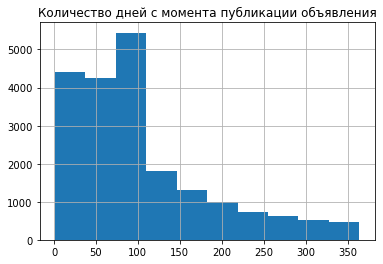

In [70]:
data['days_exposition'].hist()
plt.title('Количество дней с момента публикации объявления')
plt.show()

In [71]:
data['days_exposition'].describe()

count    20518.000000
mean       103.299639
std         82.623317
min          1.000000
25%         45.000000
50%         95.000000
75%        135.000000
max        364.000000
Name: days_exposition, dtype: float64

Распределение в столбце `days_exposition` показывает, что в основном через 100 дней объявления снимают с публикации. Далее идет небольшая "ступенька" на значении 300 дней.
Распределение нормальное.
Среднее арифметическое значение - 180 дней.
Медиана - 95 дней.

**Рассмотрим, какие параметры влияют на стоимость квартир.**

* Зависимость цены от общей площади:

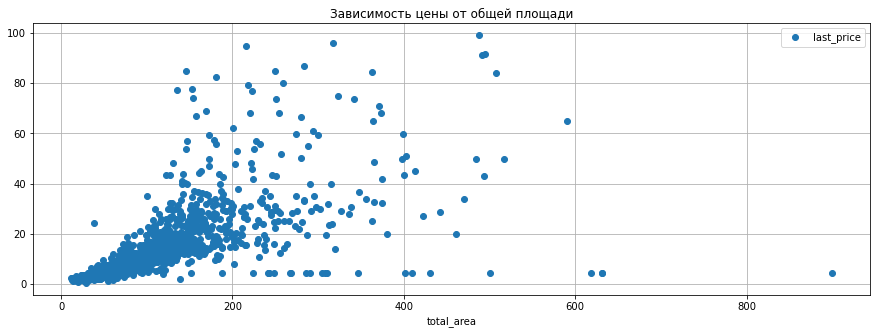

In [72]:
price_total_area = data.pivot_table(index='total_area', values=['last_price'], aggfunc='mean')
price_total_area.plot(style='o', grid=True, figsize=(15,5))
plt.title('Зависимость цены от общей площади')
plt.show()

In [73]:
data['total_area'].corr(data['last_price'])

0.7185401935829667

Из распределения зависимости цены квартиры от общей площади заметна тенденция - при увеличении площади увеличивается стоимость квартиры. Коэфициент корреляции - 0.72 говорит и достаточно сильной зависимости.

* Зависимость цены от жилой площади:

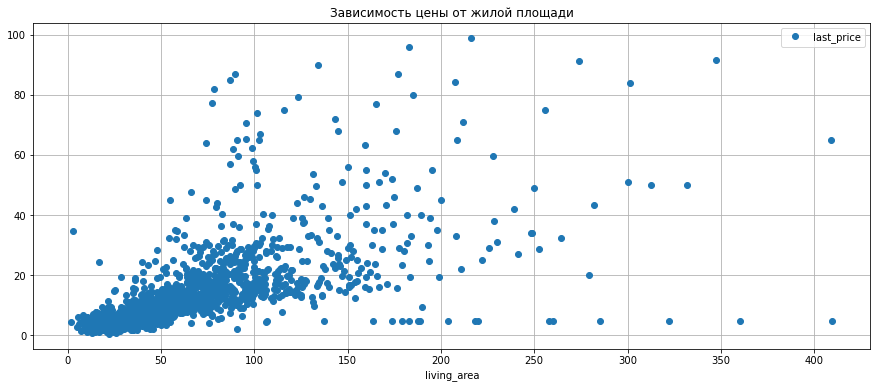

In [74]:
price_living_area = data.pivot_table(index='living_area', values=['last_price'], aggfunc='mean')
price_living_area.plot(style='o', grid=True, figsize=(15,6))
plt.title('Зависимость цены от жилой площади')
plt.show()

In [75]:
data['living_area'].corr(data['last_price'])

0.6559249591291106

При увеличении жилой площади увеличивается стоимость квартиры. Коэфициент корреляции - 0.66, что говорит о существующей средней степени зависимости.

* Зависимость цены от площади кухни:

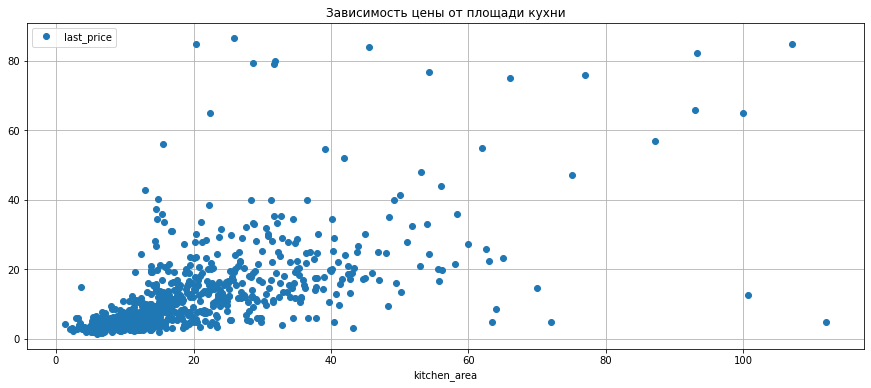

In [76]:
price_kitchen_area = data.pivot_table(index='kitchen_area', values=['last_price'], aggfunc='mean')
price_kitchen_area.plot(style='o', grid=True, figsize=(15,6))
plt.title('Зависимость цены от площади кухни')
plt.show()

In [77]:
data['kitchen_area'].corr(data['last_price'])

0.5743117586858707

Зависимость цены от площади кухни небольшая, коэффициент корреляции 0,54 также свидетельствует об этом. Стоимость немного увеличивается при увеличении площади кухни.

* Зависимость цены от количества комнат:

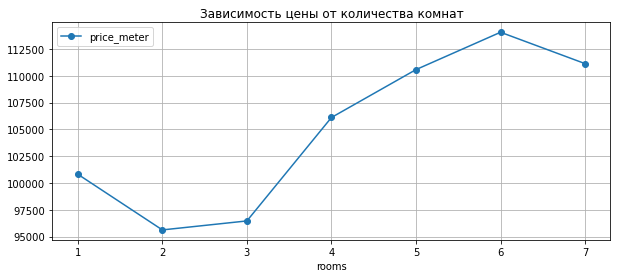

In [78]:
price_rooms = data.pivot_table(index='rooms', values=['price_meter'], aggfunc='mean')
price_rooms.plot(style='o-', grid=True, figsize=(10,4))
plt.title('Зависимость цены от количества комнат')
plt.show()

Однокомнатные квартиры дороже 2х-3х-комнатных, далее начиная с 4х-комнатных идет рост стоимости в зависимости от количества комнат.

* Зависимость цены от o	этажа, на котором расположена квартира (первый, последний, другой):

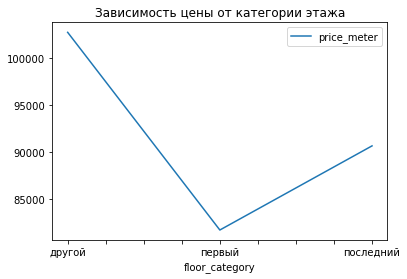

In [79]:
price_floor_category = data.pivot_table(index = 'floor_category', values = 'price_meter', aggfunc = ['mean'])
price_floor_category.plot(y = 'mean')
plt.title('Зависимость цены от категории этажа')
plt.show()

Квартиры дороже когда они "не на первом и не на последнем" этажах. На первом самые дешевые, что соответствует действительности.

* Зависимость цены от даты размещения (день недели, месяц, год):

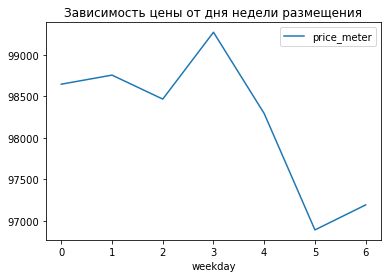

In [80]:
price_weekday = data.pivot_table(index = 'weekday', values = 'price_meter', aggfunc = ['mean'])
price_weekday.plot(y = 'mean')
plt.title('Зависимость цены от дня недели размещения')
plt.show()

В четверг стоимость квартир наиболее высокая, в воскресенье снижается стоимость.

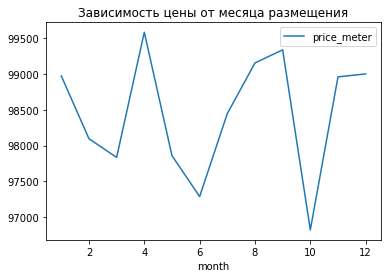

In [81]:
price_month = data.pivot_table(index = 'month', values = 'price_meter', aggfunc = ['mean'])
price_month.plot(y = 'mean')
plt.title('Зависимость цены от месяца размещения')
plt.show()

Пик цены приходится на апрель, далее заметный скачок на сентябрь. Тогда как в июне и  в октябре заметные снижения публикации объявлений.

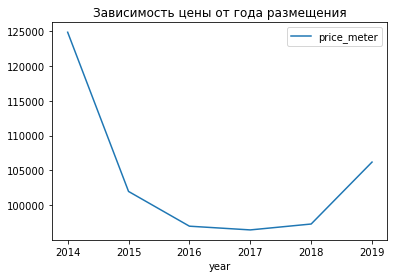

In [82]:
price_year = data.pivot_table(index = 'year', values = 'price_meter', aggfunc = ['mean'])
price_year.plot(y = 'mean')
plt.title('Зависимость цены от года размещения')
plt.show()

Стоимость квартир снижалась, начиная с 2014 года по 2016 год. Далее стоимость была стагнирована до 2018 года.
С 2018 года по 2019 видна явная тенденция возрастания стоимости квартир.

**4. Поиск населенных пунктов с набольшим количеством объявлений, минимальной стоимости и максимальной стоимости.**

Создадим сводную таблицу с населенными пунктами и средней стоимостью:

In [83]:
locality_pivot = data.pivot_table(index = 'locality_name', values = 'price_meter', aggfunc=['count', 'mean'])
locality_pivot.columns = ['count', 'mean']
locality_pivot

,count,mean
locality_name,,
,49,94309.995102
Бокситогорск,16,17551.591250
Волосово,36,40183.326111
Волхов,111,35087.680000
Всеволожск,398,68654.473970
...,...,...
село Путилово,2,39921.755000
село Рождествено,3,37733.160000
село Русско-Высоцкое,9,54833.727778


Сгруппируем данные в порядке убывания количества объявлений:

In [84]:
locality_pivot.sort_values('count', ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15721,113372.095669
посёлок Мурино,556,85681.762572
посёлок Шушары,440,78677.364318
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
посёлок Парголово,327,90175.913089
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


Найдем населенный пункт из сгруппированных данных с максимальной стоимостью квартир:

In [85]:
locality_pivot[locality_pivot['mean']==locality_pivot['mean'].max()]

,count,mean
locality_name,,
Зеленогорск,24,115122.799583


Найдем населенный пункт из сгруппированных данных с минимальной стоимостью квартир:

In [86]:
locality_pivot[locality_pivot['mean']==locality_pivot['mean'].min()]

,count,mean
locality_name,,
деревня Старополье,3,11206.22


В Санкт-Петербурге стоимость квартир самая высокая из выборки с самым большим количеством объявлений.
Самая низкая стоимость из 10 населенных пунктов с наиболее высоким количеством объявлений в Выборге.

In [87]:
center_pivot_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index= 'distance_to_center_km', values= 'price_meter', aggfunc = 'mean')

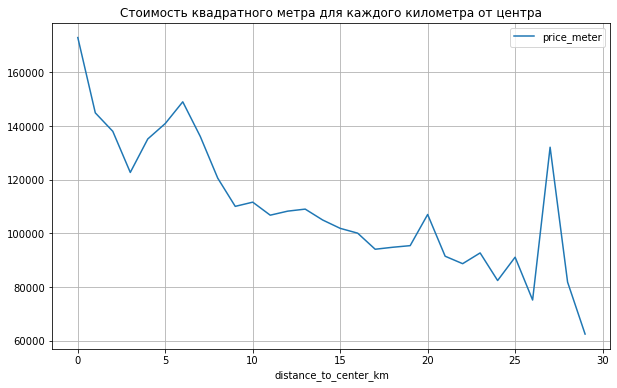

In [88]:
center_pivot_km.plot(y = 'price_meter', grid=True, figsize=(10, 6))
plt.title('Cтоимость квадратного метра для каждого километра от центра')
plt.show()

Чем дальше от центра, тем дешевле. Есть пики и в удалении от центра, возможно, это загородные особняки.

### Общий вывод

Таким образом, цели достигнуты, а именно, выведены зависимости стоимости жилья в зависимости от различных параметров, разработана автоматизированная система, позволяющая отследить аномалии и мошенническую деятельность.

В ходе работы была проведена предобработка исходных данных, выявлены пропуски и устранены в зависимости от ситуации, отработаны вылеты в исходных данных.

Можно сделать следующие выводы:

* В основном квартиры имеют общую площадь до 100 кв. м. При увеличении площади увеличивается стоимость квартиры. Аналогично с жилой площадью и площадью кухни - чем больше площаддь, чем выше стоимость;
* Двух-трёхкомнатных квартир больше;
* В основном квартиры имеют высоту потолка около 3 м;
* Средняя стоимость квартир 4 650 000;
* Однокомнатные квартиры дороже 2х-3х-комнатных, далее начиная с 4х-комнатных идет рост стоимости в зависимости от количества комнат;
* Квартиры дороже когда они "не на первом и не на последнем" этажах. На первом самые дешевые.
* В основном квартиры расположены с 1 по 5 этажи. Что касается этажности домов пик приходится на 5ти-этажные дома, далее идут 9ти-этажные, также есть скачки на значениях 12, 16 и 25;

* В выходные люди в 2 раза реже публикуют объявления;
* В четверг стоимость квартир наиболее высокая, в воскресенье снижается стоимость;
* Пик цены приходится на апрель, далее заметный скачок на сентябрь. Тогда как в июне и в октябре заметные снижения публикации объявлений;
* Гораздо чаще люди публикуют объявления о продаже квартир в ноябре, январе. Тогда как в декабре наоборот - никто не спешит продавать недвижимость;
* В основном через 100 дней объявления снимают с публикации, возможно, это средний период продажи квартиры;
* Парки расположены чаще всего в 500 м, аэропорты в 20 км.
* Стоимость квартир снижалась, начиная с 2014 года по 2016 год. Далее стоимость была стагнирована до 2018 года. С 2018 года по 2019 видна явная тенденция возрастания стоимости квартир;
* В Санкт-Петербурге стоимость квартир самая высокая из выборки с самым большим количеством объявлений. Самая низкая стоимость из 10 населенных пунктов с наиболее высоким количеством объявлений в Выборге.
* Чем дальше от центра, тем дешевле стоимость квадратного метра недвижимости в Санкт-Петербурге. Есть пик значений и в удалении от центра, возможно, это загородный особняк.

